In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin':
    plt.style.use('seaborn-darkgrid')
    rc('font', family = 'AppleGothic')

elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
#for colab # 한글폰트 설치
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,042 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120831 files and dire

In [4]:
#for colab
#plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

In [6]:
# 패스 지정해주기
data_path = 'esg_merge.csv'
df = pd.read_csv(data_path)

# 데이터 프레임 정리하기
df['company_id'] = df['Unnamed: 0']
df.drop(['Unnamed: 0'], axis=1, inplace=True)

df = df.replace("-", np.nan) # -는 결측치로, nan으로 처리.

df.head(5)

,회사명,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,한국ESG연구소,Moody's,MSCI,S&P,연도,company_id
0,AJ네트웍스,B,D,B,B,NaN,NaN,NaN,NaN,2020,0
1,AJ네트웍스,B,D,B,B,NaN,NaN,NaN,NaN,2021,0
2,AJ네트웍스,B+,C,B+,B+,NaN,NaN,NaN,NaN,2022,0
3,AJ네트웍스,B+,C,B+,B+,NaN,NaN,NaN,NaN,2023,0
4,AK홀딩스,B+,C,B+,B+,NaN,NaN,NaN,NaN,2020,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3176 entries, 0 to 3175
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   회사명         3176 non-null   object
 1   KCGS_종합등급   3086 non-null   object
 2   KCGS_환경     3086 non-null   object
 3   KCGS_사회     3086 non-null   object
 4   KCGS_지배구조   3086 non-null   object
 5   한국ESG연구소    618 non-null    object
 6   Moody's     236 non-null    object
 7   MSCI        457 non-null    object
 8   S&P         1099 non-null   object
 9   연도          3176 non-null   int64 
 10  company_id  3176 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 273.1+ KB


In [8]:
df.isna().sum() / len(df)

회사명           0.000000
KCGS_종합등급     0.028338
KCGS_환경       0.028338
KCGS_사회       0.028338
KCGS_지배구조     0.028338
한국ESG연구소      0.805416
Moody's       0.925693
MSCI          0.856108
S&P           0.653967
연도            0.000000
company_id    0.000000
dtype: float64

In [9]:
## KCGS_종합등급 ~ KCGS_지배구조 4개의 column에 모두 결측치가 존재하는 행 90개가 있음.
## 이는 행을 drop하는 것이 좋을 것.
drop_rows = df[df['KCGS_종합등급'].isna()]
display(drop_rows.isna().sum())

df = df.drop(drop_rows.index, axis=0)

drop_rows = df[df['S&P'].isna()]
df = df.drop(drop_rows.index, axis=0)
df.info()

회사명            0
KCGS_종합등급     90
KCGS_환경       90
KCGS_사회       90
KCGS_지배구조     90
한국ESG연구소      62
Moody's       90
MSCI          70
S&P           56
연도             0
company_id     0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1065 entries, 5 to 3163
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   회사명         1065 non-null   object
 1   KCGS_종합등급   1065 non-null   object
 2   KCGS_환경     1065 non-null   object
 3   KCGS_사회     1065 non-null   object
 4   KCGS_지배구조   1065 non-null   object
 5   한국ESG연구소    578 non-null    object
 6   Moody's     236 non-null    object
 7   MSCI        334 non-null    object
 8   S&P         1065 non-null   object
 9   연도          1065 non-null   int64 
 10  company_id  1065 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 99.8+ KB


In [10]:
drop_columns = ["한국ESG연구소", "Moody's", "MSCI"]
final_df = df.drop(drop_columns, axis=1)

## drop_columns는 결측치 비율이 너무 높아 해당 column을 제거하는 것이 타당.
## 우선 EDA는 제거할 column까지 하겠지만, 실제로는 drop하는 것이 좋을 것.

In [11]:
categorical_variables = ['KCGS_종합등급', 'KCGS_환경', 'KCGS_사회', 'KCGS_지배구조']

In [12]:
final_df

,회사명,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,S&P,연도,company_id
5,AK홀딩스,B+,B,B+,B+,1,2021,1
6,AK홀딩스,B+,B,A,B,4,2022,1
7,AK홀딩스,B+,B,A,B,4,2023,1
9,BGF,A,A,A+,A,13,2021,2
10,BGF,B+,A,A+,B,18,2022,2
...,...,...,...,...,...,...,...,...
3154,휠라홀딩스,B+,B,A,B+,40,2022,788
3155,휠라홀딩스,B+,B,A,B+,40,2023,788
3161,휴비스,A,B+,A+,A,5,2021,790
3162,휴비스,B+,B+,A,B+,6,2022,790


In [13]:
# 정수 인코딩
rating_mapping = {'A': 4, 'A+': 4.5, 'B': 3, 'B+': 3.5, 'C': 2, 'D': 1}

for col in categorical_variables:
    final_df[f"{col}_encoded"] = final_df[col].map(rating_mapping)

In [14]:
final_df

,회사명,KCGS_종합등급,KCGS_환경,KCGS_사회,KCGS_지배구조,S&P,연도,company_id,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded
5,AK홀딩스,B+,B,B+,B+,1,2021,1,3.5,3.0,3.5,3.5
6,AK홀딩스,B+,B,A,B,4,2022,1,3.5,3.0,4.0,3.0
7,AK홀딩스,B+,B,A,B,4,2023,1,3.5,3.0,4.0,3.0
9,BGF,A,A,A+,A,13,2021,2,4.0,4.0,4.5,4.0
10,BGF,B+,A,A+,B,18,2022,2,3.5,4.0,4.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3154,휠라홀딩스,B+,B,A,B+,40,2022,788,3.5,3.0,4.0,3.5
3155,휠라홀딩스,B+,B,A,B+,40,2023,788,3.5,3.0,4.0,3.5
3161,휴비스,A,B+,A+,A,5,2021,790,4.0,3.5,4.5,4.0
3162,휴비스,B+,B+,A,B+,6,2022,790,3.5,3.5,4.0,3.5


In [15]:
final_df.to_csv("./esg_regression_preprocessing.csv", encoding='utf-8-sig')

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv('esg_regression_preprocessing.csv')

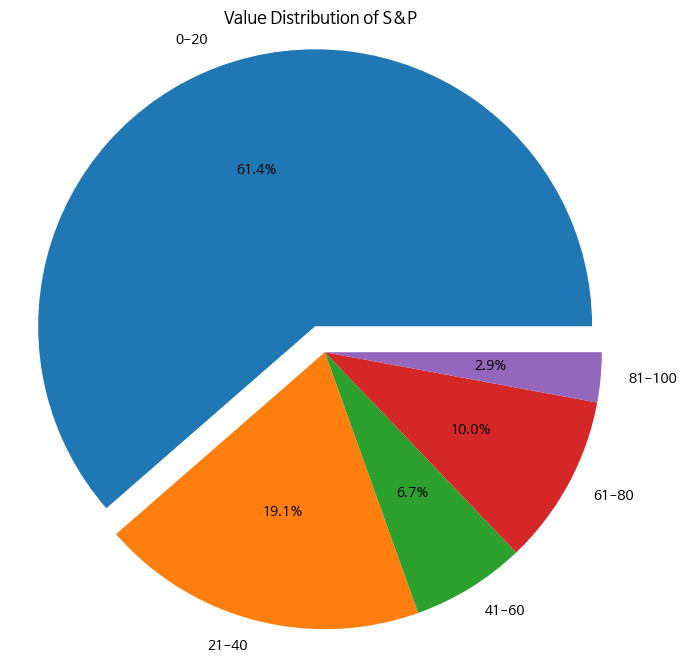

In [18]:
def plot_pie_chart(df, data):
    data_series = df[data]  # 열의 데이터 가져오기

    # 구간 설정
    bins = [0, 20, 40, 60, 80, 100]

    # 데이터를 구간에 할당하고 빈도 계산
    hist, _ = np.histogram(data_series, bins=bins)

    # 각 구간별 빈도를 비율로 변환
    total_count = len(data_series)
    ratios = [count / total_count * 100 for count in hist]

    # 범주 이름
    categories = ['0-20', '21-40', '41-60', '61-80', '81-100']

    explode=[0.1,0,0,0,0]

    # 파이 차트 그리기
    plt.figure(figsize=(8, 8))
    plt.pie(ratios, labels=categories,explode=explode, autopct='%1.1f%%')
    plt.title(f'Value Distribution of {data}')
    plt.axis('equal')  # 원의 비율을 유지합니다.
    plt.show()

plot_pie_chart(df, 'S&P')

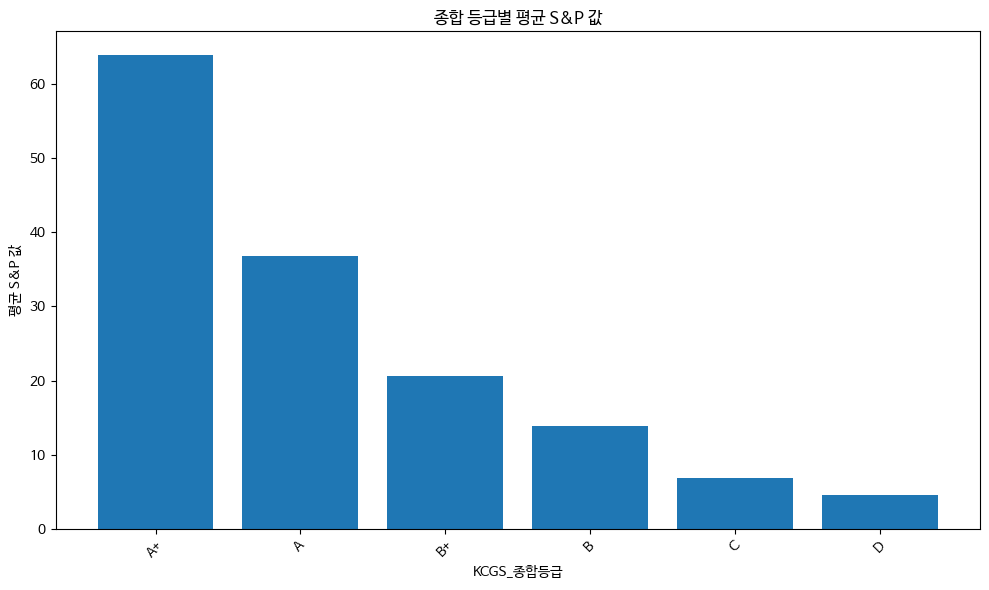

In [19]:
custom_order = ['A+', 'A', 'B+', 'B', 'C', 'D']

# 종합 등급별로 데이터 그룹화하고 S&P 값의 평균 계산
grouped_1 = df.groupby('KCGS_종합등급')['S&P'].mean().reindex(custom_order).reset_index()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(grouped_1['KCGS_종합등급'], grouped_1['S&P'])
plt.xlabel('KCGS_종합등급')
plt.ylabel('평균 S&P 값')
plt.title('종합 등급별 평균 S&P 값')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 표시
plt.show()

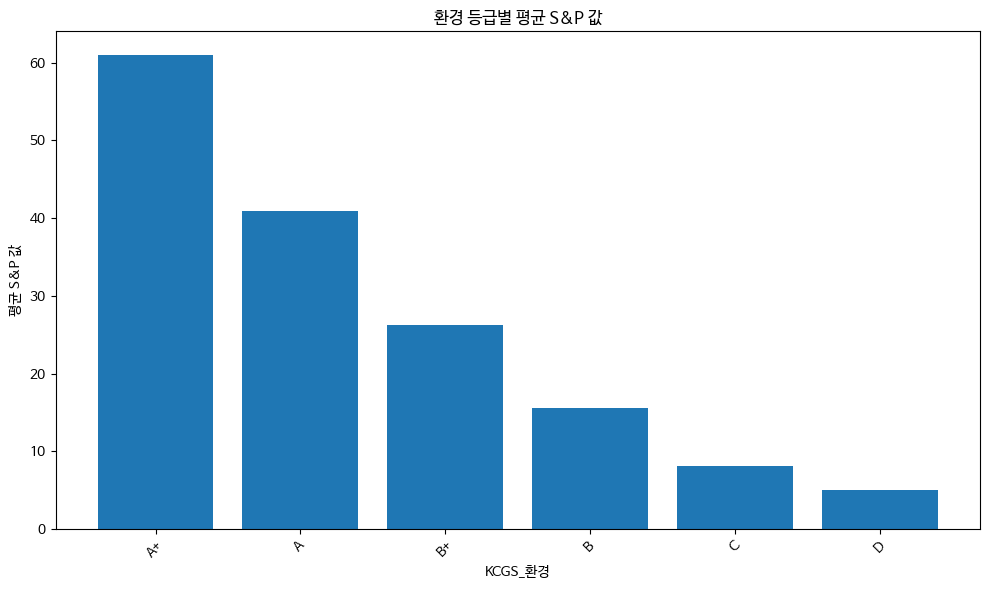

In [20]:
# 환경 등급별로 데이터 그룹화하고 S&P 값의 평균 계산
grouped_2 = df.groupby('KCGS_환경')['S&P'].mean().reindex(custom_order).reset_index()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(grouped_2['KCGS_환경'], grouped_2['S&P'])
plt.xlabel('KCGS_환경')
plt.ylabel('평균 S&P 값')
plt.title('환경 등급별 평균 S&P 값')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 표시
plt.show()

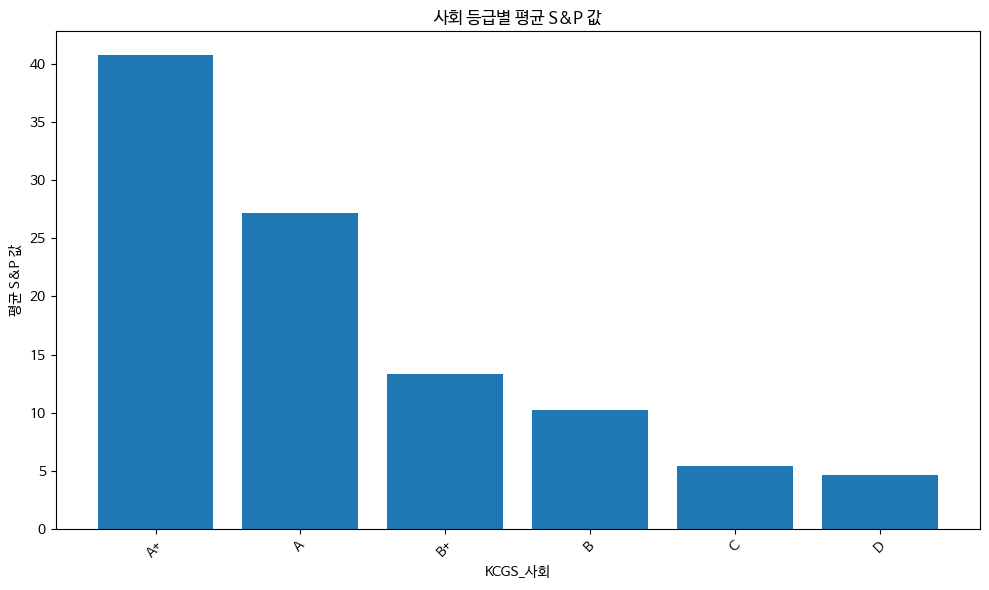

In [21]:
# 사회 등급별로 데이터 그룹화하고 S&P 값의 평균 계산
grouped_3 = df.groupby('KCGS_사회')['S&P'].mean().reindex(custom_order).reset_index()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(grouped_3['KCGS_사회'], grouped_3['S&P'])
plt.xlabel('KCGS_사회')
plt.ylabel('평균 S&P 값')
plt.title('사회 등급별 평균 S&P 값')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 표시
plt.show()

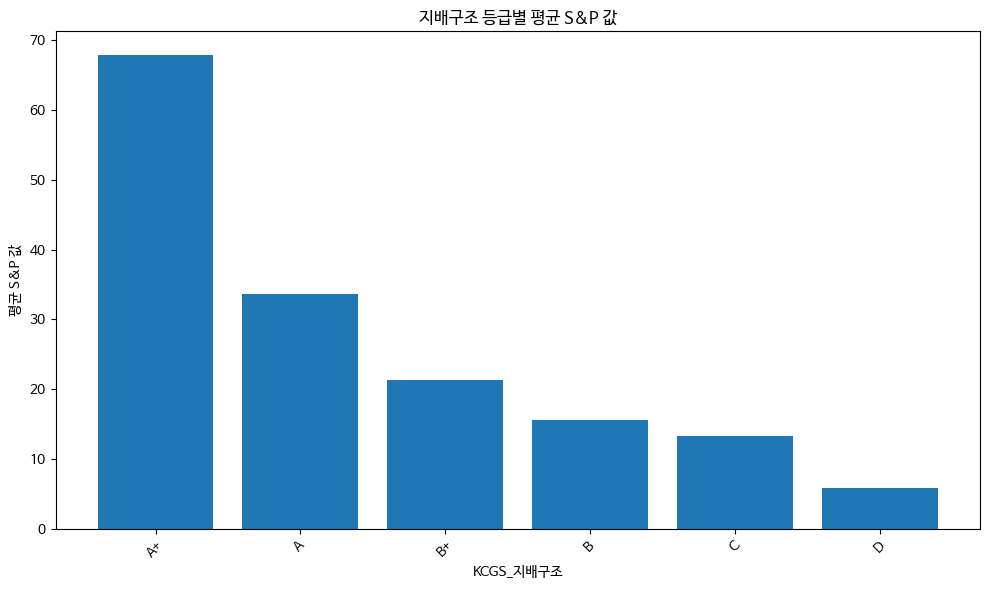

In [22]:
# 지배구조 등급별로 데이터 그룹화하고 S&P 값의 평균 계산
grouped_4 = df.groupby('KCGS_지배구조')['S&P'].mean().reindex(custom_order).reset_index()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(grouped_4['KCGS_지배구조'], grouped_4['S&P'])
plt.xlabel('KCGS_지배구조')
plt.ylabel('평균 S&P 값')
plt.title('지배구조 등급별 평균 S&P 값')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 표시
plt.show()

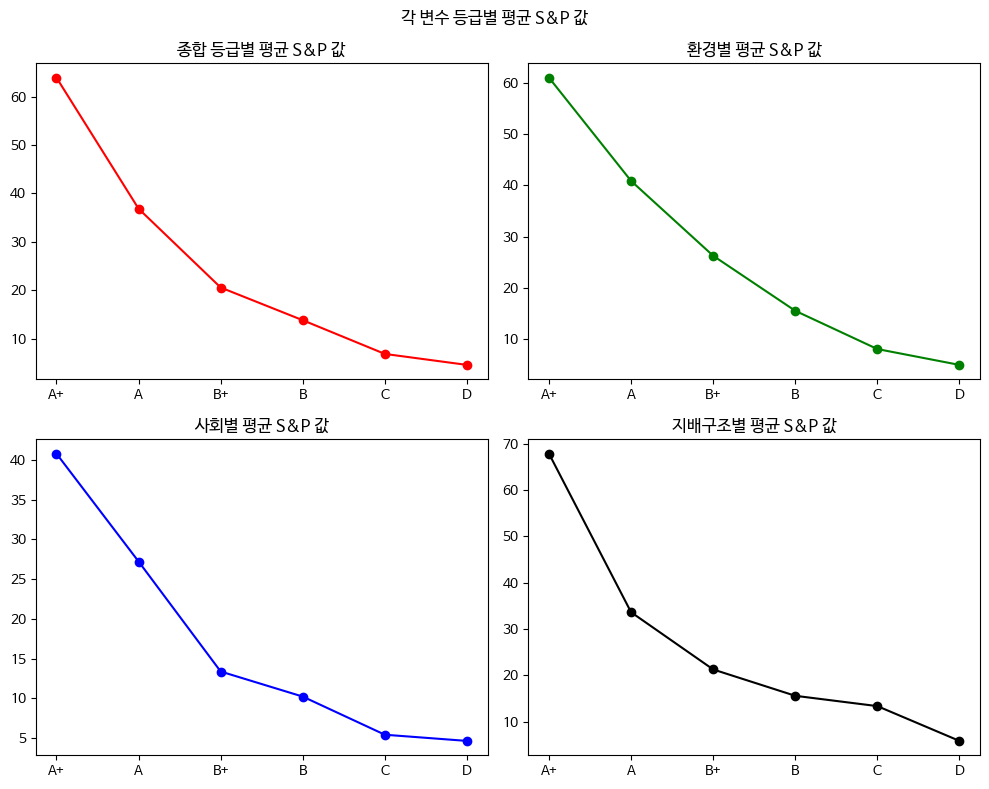

In [23]:
# 각 변수 등급별 평균 S&P값 시각화
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1, title="종합 등급별 평균 S&P 값") # subplot 위치와 title 설정
plt.plot(grouped_1["KCGS_종합등급"], grouped_1["S&P"], 'o-r') # line graph 1 그리기

plt.subplot(2, 2, 2, title="환경별 평균 S&P 값") # subplot 위치와 title 설정
plt.plot(grouped_2["KCGS_환경"], grouped_2["S&P"], 'o-g') # line graph 2 그리기

plt.subplot(2, 2, 3, title="사회별 평균 S&P 값") # subplot 위치와 title 설정
plt.plot(grouped_3["KCGS_사회"], grouped_3["S&P"], 'o-b') # line graph 3 그리기

plt.subplot(2, 2, 4, title="지배구조별 평균 S&P 값") # subplot 위치와 title 설정
plt.plot(grouped_4["KCGS_지배구조"], grouped_4["S&P"], 'o-k') # line graph 4 그리기

plt.suptitle("각 변수 등급별 평균 S&P 값")

plt.tight_layout()
plt.show();

In [24]:
# 각 변수별 상관관계 파악을 위해 상관계수 계산
corr = df[['S&P', 'KCGS_종합등급_encoded','KCGS_환경_encoded', 'KCGS_사회_encoded', 'KCGS_지배구조_encoded', '연도']].corr()
corr

,S&P,KCGS_종합등급_encoded,KCGS_환경_encoded,KCGS_사회_encoded,KCGS_지배구조_encoded,연도
S&P,1.000000,0.495345,0.562605,0.481300,0.381159,0.065755
KCGS_종합등급_encoded,0.495345,1.000000,0.805102,0.841601,0.868640,-0.190044
KCGS_환경_encoded,0.562605,0.805102,1.000000,0.790648,0.555000,-0.084821
KCGS_사회_encoded,0.481300,0.841601,0.790648,1.000000,0.592817,-0.105822
KCGS_지배구조_encoded,0.381159,0.868640,0.555000,0.592817,1.000000,-0.273581
연도,0.065755,-0.190044,-0.084821,-0.105822,-0.273581,1.000000


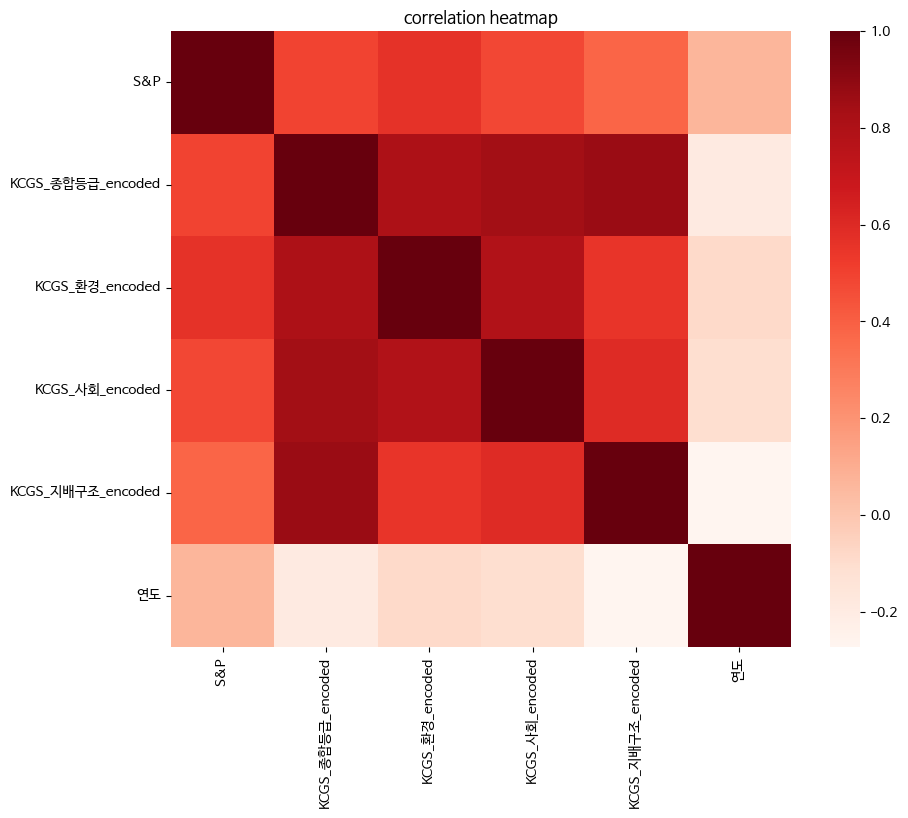

In [25]:
# 상관계수 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='Reds')
plt.title("correlation heatmap")
plt.show()

* S&P와 나머지 변수들 사이의 양의 상관관계가 존재
* KCGS_환경 > KCGS_종합등급 > KCGS_사회 > KCGS_지배구조 > 연도 순으로 양의 상관관계가 강함